In [2]:
# импортируем библиотеку pandas для работы с датафреймами
import pandas as pd
# импортируем seaborn для визуализации
import seaborn as sns
# импортируем sklearn для кластеризации
from sklearn.cluster import KMeans 

In [3]:
# загружаем данные
df = pd.read_csv('./data/pokemon.csv')
# датасет содержит название покемона, уровень его защиты, силу атаки и скорость
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


In [4]:
X = df[['Attack', 'Defense']]

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

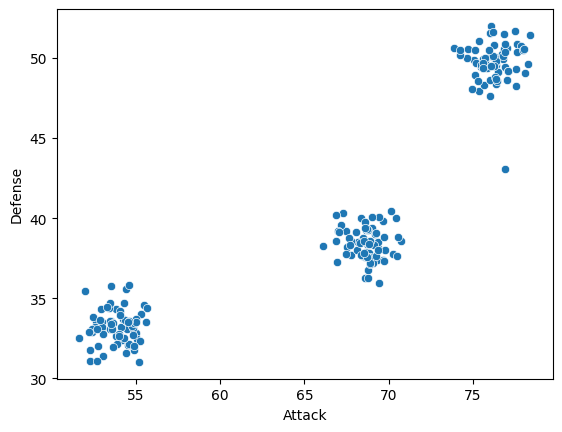

In [5]:
sns.scatterplot(x = df['Attack'], y = df['Defense'])

In [6]:
kmeans = KMeans(
    n_clusters=3,
    init='k-means++',
    n_init=10,
    random_state=42
)

In [7]:
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [8]:
prediction = kmeans.predict(X)

In [9]:
kmeans.labels_

array([1, 0, 1, 1, 0, 2, 1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 2, 0, 0, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 1, 2, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1,
       1, 0, 2, 0, 0, 2, 1, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 1, 2, 0, 0, 0,
       0, 2, 0, 1, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 2, 2, 2,
       1, 0, 1, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 0,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 0, 1, 0, 0, 1,
       1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2, 0, 2, 2, 1, 0,
       0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 0, 0, 1, 1, 1,
       0, 2, 1, 1, 1, 1, 0, 2], dtype=int32)

In [10]:
df['Clusters_k3'] = prediction

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

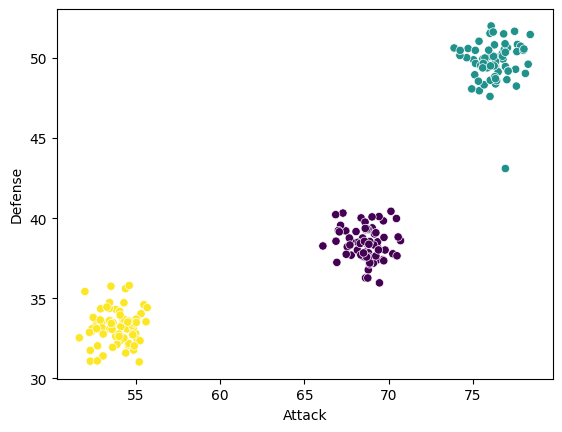

In [11]:
sns.scatterplot(x=df['Attack'], y=df['Defense'], c=prediction)

In [12]:
kmeans = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    random_state=42
)

In [13]:
kmeans.fit(X)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [14]:
prediction = kmeans.predict(X)

In [15]:
df['Clusters_k4'] = prediction

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

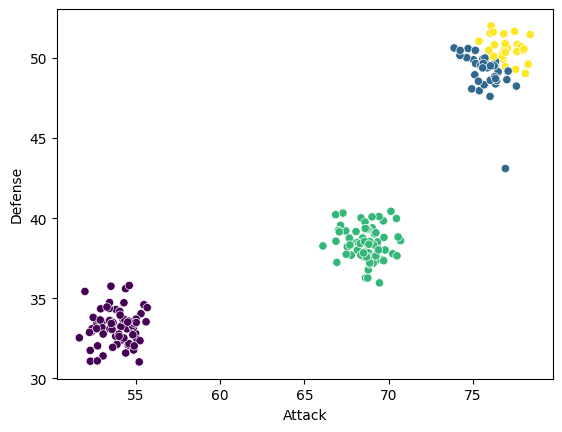

In [16]:
sns.scatterplot(
    x=df['Attack'],
    y=df['Defense'],
    c=prediction
)

---

In [17]:
data = pd.read_csv('./data/values_from_the_instrument.csv')

In [18]:
data.head()

,x1,x2
0,48.848600,67.882051
1,60.343304,74.215686
2,48.155670,68.313920
3,48.546786,68.090451
4,47.124609,67.132278


In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X = data

In [20]:
def get_silhouette(cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, init='k-means++',
                     n_init=10, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette


<AxesSubplot: xlabel='clusters', ylabel='silhouette'>

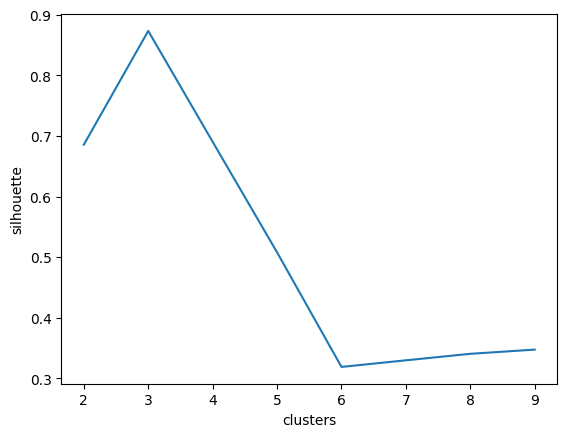

In [21]:
sil_scores = {'silhouette':[], 'clusters':[]}

for i in range(2,10):
    sil_scores['silhouette'].append(get_silhouette(i, X))
    sil_scores['clusters'].append(i)
sil_scores = pd.DataFrame(sil_scores)

sns.lineplot(
    data= sil_scores, 
    x='clusters',
    y='silhouette'
)


In [22]:
from sklearn.metrics import homogeneity_score
homogeneity_score(labels_true=[1,2,2,1,0], labels_pred=[1,0,2,1,2])

0.737175493807016

---

In [23]:
from sklearn.cluster import AgglomerativeClustering

In [24]:
aglomerative_clust = AgglomerativeClustering(n_clusters=2)

In [25]:
aglomerative_clust.fit(X)

AgglomerativeClustering()

In [26]:
aglomerative_clust.labels_

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,

---

### 4_5

In [27]:
import numpy as np
from sklearn.mixture import GaussianMixture

In [28]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)

In [29]:
gm_clustering.fit(X)

GaussianMixture(n_components=3, random_state=42)

In [30]:
gm_prediction = gm_clustering.predict(X)

---

In [31]:
housing_df = pd.read_csv('./data/housing.csv')
housing_df.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


<AxesSubplot: xlabel='year', ylabel='price'>

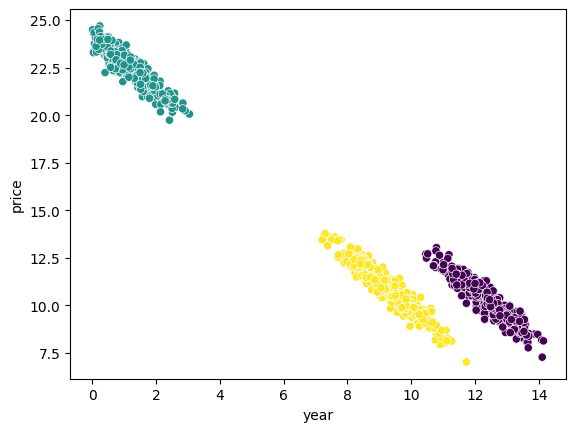

In [32]:
gm_housing = GaussianMixture(n_components=3, random_state=42)
prediction = gm_housing.fit_predict(housing_df)
sns.scatterplot(x=housing_df['year'], y=housing_df['price'],c=prediction)

<AxesSubplot: xlabel='year', ylabel='price'>

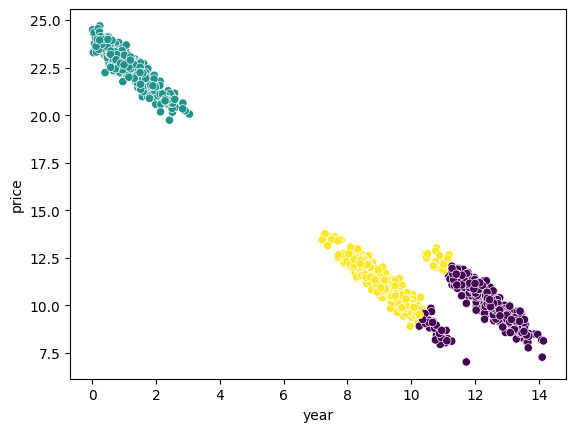

In [33]:
from sklearn.cluster import KMeans
k_housing = KMeans(n_clusters=3,n_init=10, init='k-means++', random_state=42)
k_pred = k_housing.fit_predict(housing_df)
sns.scatterplot(x=housing_df['year'], y=housing_df['price'],c=k_pred)

---

### 4_6

In [34]:
from sklearn.cluster import SpectralClustering

In [35]:
spectral_clustering = SpectralClustering(n_clusters=3,random_state=42)

In [36]:
spectral_clustering.fit(df[['Attack', 'Defense']])

SpectralClustering(n_clusters=3, random_state=42)

In [37]:
sp_pred = spectral_clustering.labels_

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

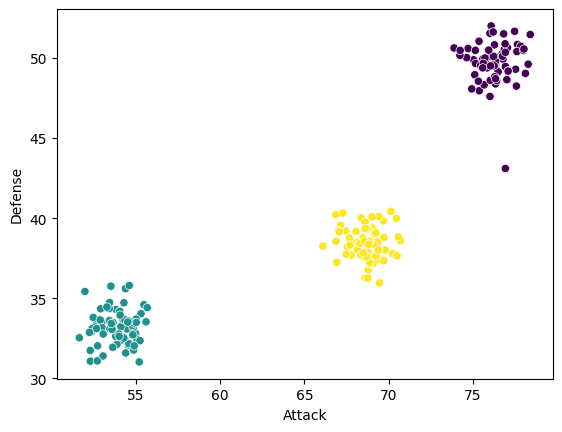

In [38]:
sns.scatterplot(x=df['Attack'], y=df['Defense'],c=sp_pred)

---

### 4_7

In [39]:
# Импортируем DBSCAN-кластеризацию
from sklearn.cluster import DBSCAN

In [40]:
# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=3, min_samples=3).fit(df[['Attack', 'Defense']])

<AxesSubplot: xlabel='Attack', ylabel='Defense'>

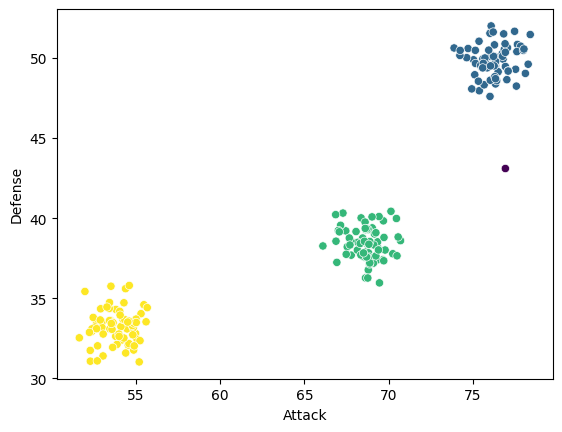

In [41]:
# Далее можно визуализировать результаты, как мы делали это с алгоритмом k-means
sns.scatterplot(x=df['Attack'], y=df['Defense'], c= clustering.labels_)

Task 7.5-7.6

In [42]:
house = pd.read_csv('./data/housing.csv')

In [43]:
house.head()

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806


In [44]:
clustering = DBSCAN(eps=0.7, min_samples=6).fit(house)

<AxesSubplot: xlabel='year', ylabel='price'>

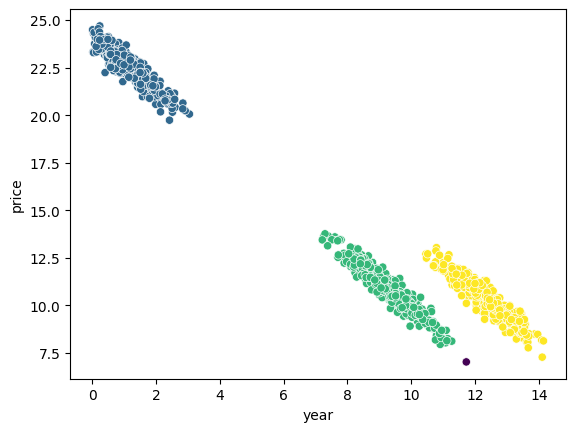

In [45]:
sns.scatterplot(x=house['year'], y=house['price'], c=clustering.labels_)

___

### 4_8

#### 2D- visualization

In [46]:
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("./data/airbnb.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<AxesSubplot: xlabel='latitude', ylabel='longitude'>

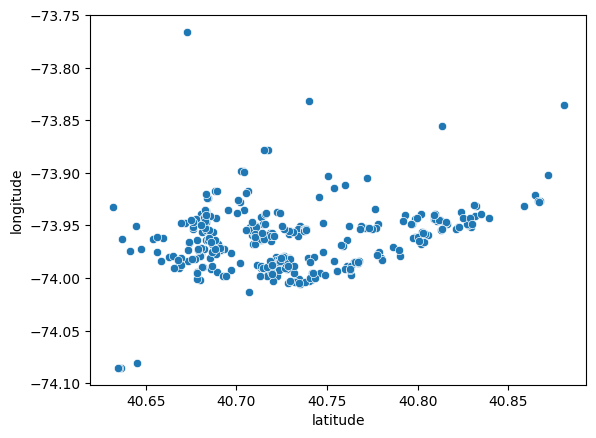

In [48]:
sns.scatterplot(x=df.latitude, y=df.longitude)

In [49]:
kmeans = KMeans(n_init=10, init='k-means++', n_clusters=6, random_state=42)
prediction = kmeans.fit_predict(df[['latitude', 'longitude']])
df['clusters'] = prediction

In [50]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,4
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1


In [51]:
# Находим центроиды кластеров
centroids = kmeans.cluster_centers_
centroids_x = [i[0] for i in centroids]
centroids_y = [i[1] for i in centroids]

In [52]:
# зададим цвета для разных кластеров
colors = ['#DF2020', '#81DF20', '#2095DF', '#DF20C8', '#20DFC5', '#DF8520']

In [53]:
# создадим пустые словари, чтобы потом соотнести координаты x и у центроидов разных кластеров, а также цвета 
centroids_x_dict = {}
centroids_y_dict = {}
colors_dict = {}

# итерируемся шесть раз, так как у нас шесть кластеров
for i in range(6):
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты x центроида — в качестве значения
    centroids_x_dict[i] = centroids_x[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение координаты y центроида — в качестве значения
    centroids_y_dict[i] = centroids_y[i]
    # сохраняем в словарь номер кластера в качестве ключа, значение цвета — в качестве значения
    colors_dict[i] = colors[i]

In [54]:
df['cen_x'] = df['clusters'].map(centroids_x_dict)
df['cen_y'] = df['clusters'].map(centroids_y_dict)
df['color'] = df['clusters'].map(colors_dict)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,clusters,cen_x,cen_y,color
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2,40.677937,-73.967837,#2095DF
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,4,40.733247,-73.989404,#20DFC5
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,1,40.810435,-73.948059,#81DF20
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2,40.677937,-73.967837,#2095DF
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1,40.810435,-73.948059,#81DF20


<AxesSubplot: xlabel='latitude', ylabel='longitude'>

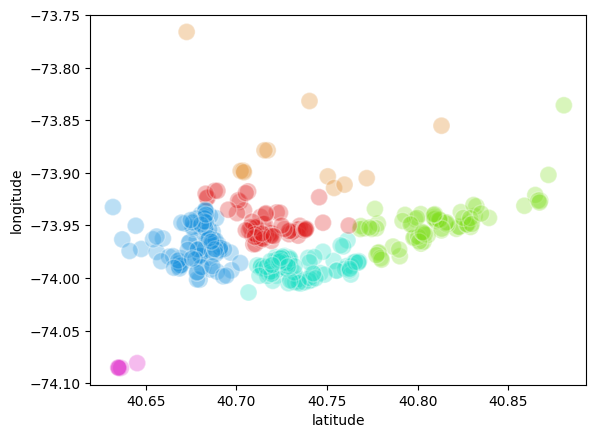

In [55]:
sns.scatterplot(x=df['latitude'], y=df['longitude'],
                c=df['color'], alpha=0.3, s=150)


<AxesSubplot: xlabel='latitude', ylabel='longitude'>

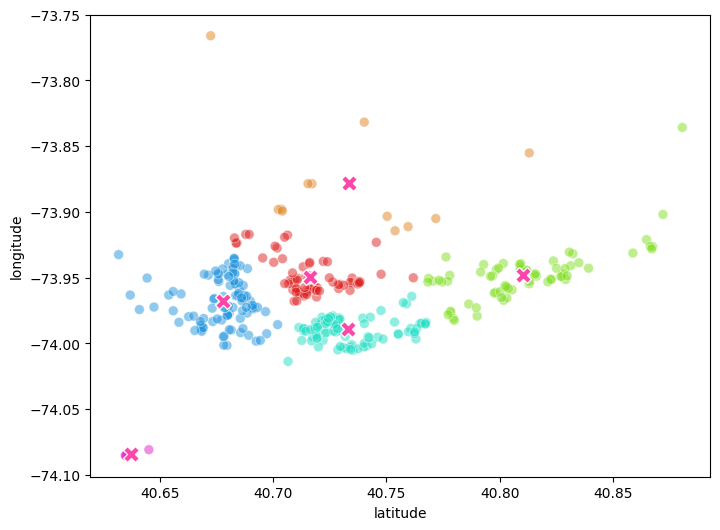

In [56]:
fig, axes = plt.subplots(figsize=(8, 6))
# визуализируем элементы датасета
# параметр c отвечает за цвет элемента в зависимости от того, к какому кластеру он принадлежит
# s отвечает за размер объектов на графике, alpha отвечает за прозрачность точек
sns.scatterplot(x=df.latitude, y=df.longitude, c=df.color, s=50, alpha=0.5)
# визуализируем центроиды: отметим их на графике крестиком (marker="X") и зададим им розовый цвет 
sns.scatterplot(x=centroids_x, y=centroids_y, marker="X", c=['#FC46AA'], s=130)

---

#### Convex hull

In [57]:
from scipy.spatial import ConvexHull
import numpy as np

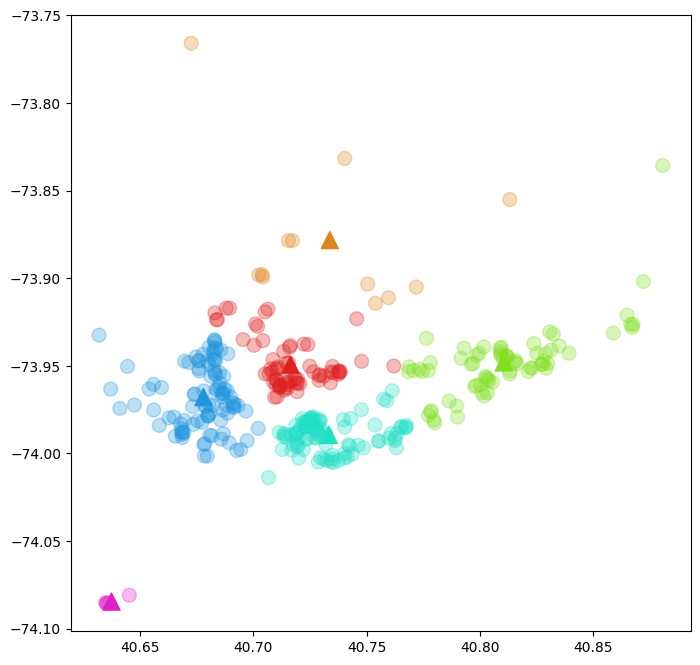

In [58]:
fig, axes = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
plt.scatter(df.latitude, df.longitude, c=df.color, alpha = 0.3, s=100)
plt.scatter(centroids_x, centroids_y, marker='^', c=colors, s=150)

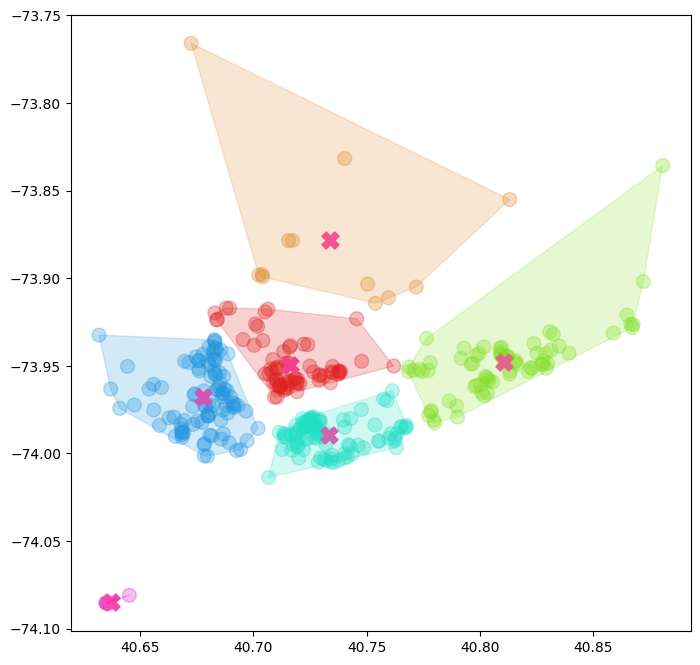

In [59]:
fig, axes = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
plt.scatter(df.latitude, df.longitude, c=df.color, alpha = 0.3, s=100)
plt.scatter(centroids_x, centroids_y, marker="X", c=['#FC46AA'], s=150)

for i in df['clusters'].unique():
    # запишем в points значения признаков широты и долготы, принадлежащие к i-му кластеру это наши вершины
    points = df.query(f'clusters == {i}')[['latitude', 'longitude']].values
    
    # передадим вершины как параметр в объект класса ConvexHull
    hull = ConvexHull(points)
    
    # Запишем координаты оболочки по оси x. Из hull.vertices узнаем индексы элементов, входящих в оболочку.
    # Так как оболочка должна быть замкнутой, то в конце добавляем ещё раз нулевой элемент.
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0])
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0])
    
    # рисуем оболочку и заливаем её таким же цветом, как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])

---

#### Дендрограммы

In [60]:
# импортируем агломеративную кластеризацию из sklearn
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [61]:
# запускаем агломеративную кластеризацию, расстояние между кластерами рассчитываем методом одиночной связи
agglomerative_clustering = AgglomerativeClustering(n_clusters=6, linkage='single')

In [62]:
# обучаем модель и получаем результаты кластеризации
predictions_ag_model = agglomerative_clustering.fit_predict(df[['latitude', 'longitude']])


In [63]:
# рассчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'single')

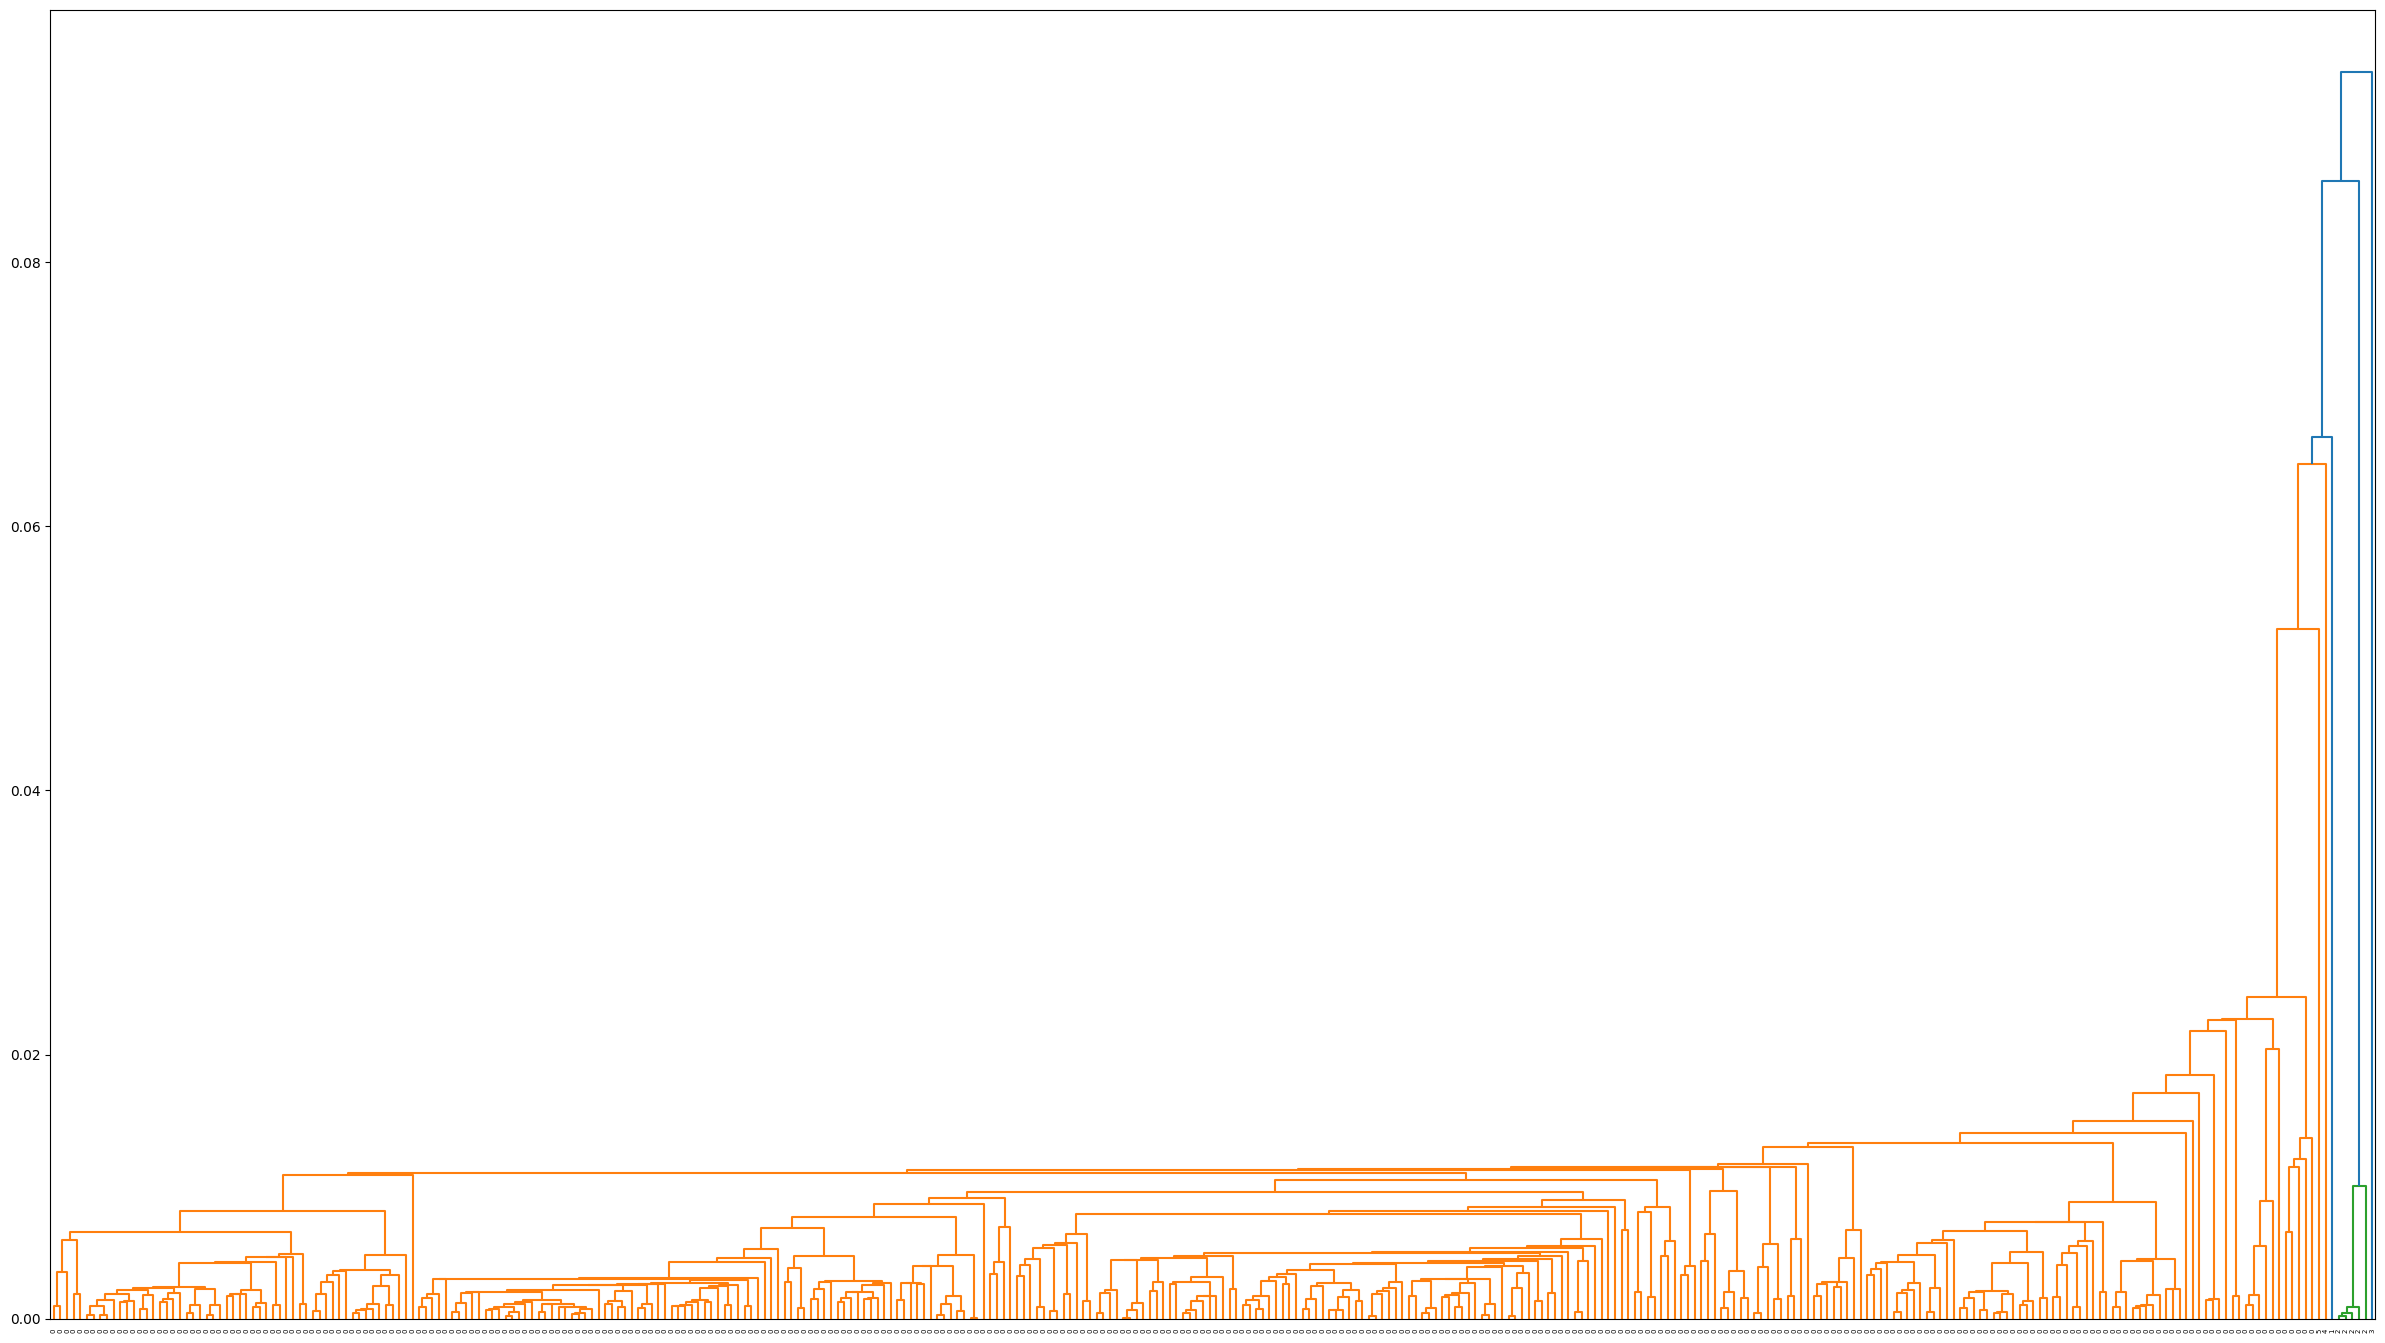

In [64]:
plt.figure(figsize=(30, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=predictions_ag_model,
            distance_sort='descending')

plt.show()

---

### Custergram визуализация

In [65]:
# импортируем библиотеку clustergram
from clustergram import Clustergram

In [66]:
# задаём количество кластеров, для которых хотим получить визуализацию, определяем метод кластеризации
cgram = Clustergram(range(1, 9), method='kmeans')

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.01380300521850586 seconds.
K=3 fitted in 0.014139175415039062 seconds.
K=4 fitted in 0.012604236602783203 seconds.
K=5 fitted in 0.015758037567138672 seconds.
K=6 fitted in 0.015408992767333984 seconds.
K=7 fitted in 0.01653289794921875 seconds.
K=8 fitted in 0.01738715171813965 seconds.


/Users/kirillkuznecov/opt/anaconda3/envs/ds/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kirillkuznecov/opt/anaconda3/envs/ds/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kirillkuznecov/opt/anaconda3/envs/ds/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/kirillkuznecov/opt/anaconda3/envs/ds/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

<AxesSubplot: xlabel='Number of clusters (k)', ylabel='PCA weighted mean of the clusters'>

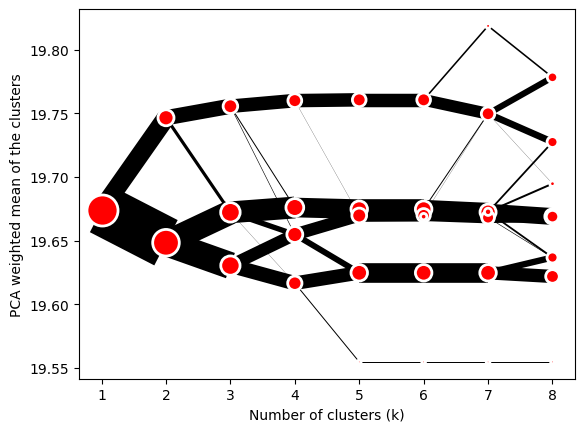

In [67]:
# запускаем алгоритм
cgram.fit(df[["latitude", "longitude"]])
cgram.plot()

---

### 3D визуализация

In [68]:
df = pd.read_csv('./data/airbnb.csv')

In [69]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [70]:
# инициализируем k-means-кластеризацию с шестью кластерами
kmeans_clustering = KMeans(n_clusters=6, n_init='auto')

In [71]:
# обучим k-means-модель кластеризации на данных широты, долготы и цены, сохраним данные о кластерах для этих 
# данных в kmeans_predictions
kmeans_prediction = kmeans_clustering.fit_predict(
    df[['latitude', 'longitude', 'price']])


In [72]:
# сохраним предсказания в колонку clusters датафрейма
df["clusters_3d"] = kmeans_prediction

In [73]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0, 'price')

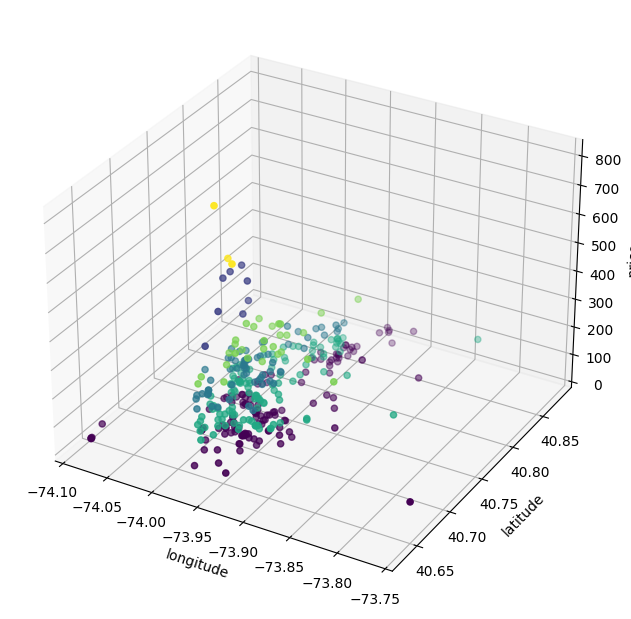

In [74]:
# создадим трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)

# добавим дополнительную ось в объект картинки
fig.add_axes(ax)

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.clusters_3d)
# добавим оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

Text(0.5, 0, 'price')

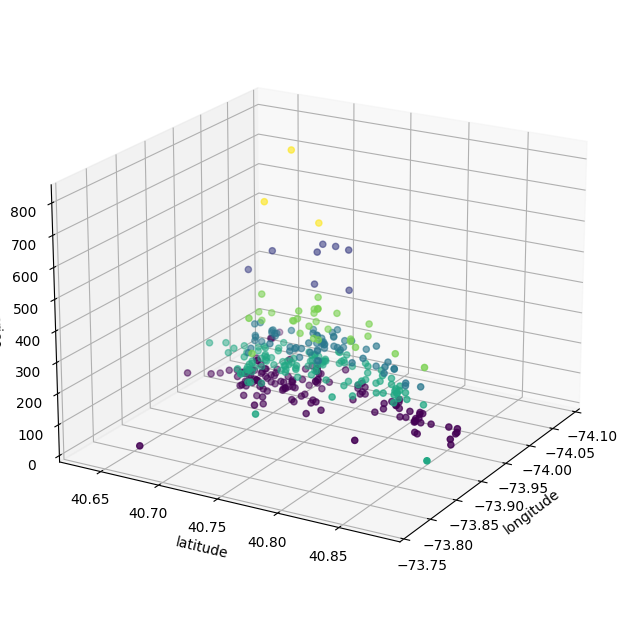

In [75]:
# создаём трёхмерный объект
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig)
# добавляем дополнительную ось в объект картинки
fig.add_axes(ax)

ax.azim = 30
ax.elev = 20

# визуализируем данные, передав значения x, y, z, а также информацию о группировке данных по цветам
ax.scatter(df.longitude.to_list(), df.latitude.to_list(), df.price.to_list(), c=df.clusters_3d)
# добавляем оси
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_zlabel('price')

In [76]:
import plotly
import plotly.express as px

# передаём датафрейм и поля, которые нужно использовать для осей абсцисс, ординат и аппликат
# в значение color передаём номера кластеров
fig = px.scatter_3d(
    data_frame=df, 
    x = 'longitude', 
    y = 'latitude', 
    z = 'price', 
    color=df.clusters_3d, 
    width=1000,
    height=700
)

#отображаем график
fig.show()

---

Task 8.4

Для датасета Airbnb проведите иерархическую алгомеративную кластеризацию с использованием sklearn. В качестве признаков для кластеризации используйте latitude и longitude из датафрейма, количество кластеров для кластеризации — 6. Расстояние между кластерами рассчитайте методом полной связи, направление дендрограммы — top.

Визуализируйте дендрограмму для проведённой кластеризации. На сколько кластеров можно разделить датасет, если расстояние между кластерами будет равно 0.25?

In [77]:
aglomerative_airbnb = AgglomerativeClustering(n_clusters=6, linkage='complete')

In [78]:
airbnb_predict = aglomerative_airbnb.fit_predict(df[['latitude', 'longitude']])

In [79]:
# рассчитаем расстояния между кластерами
linked = linkage(df[["latitude", "longitude"]], 'complete')

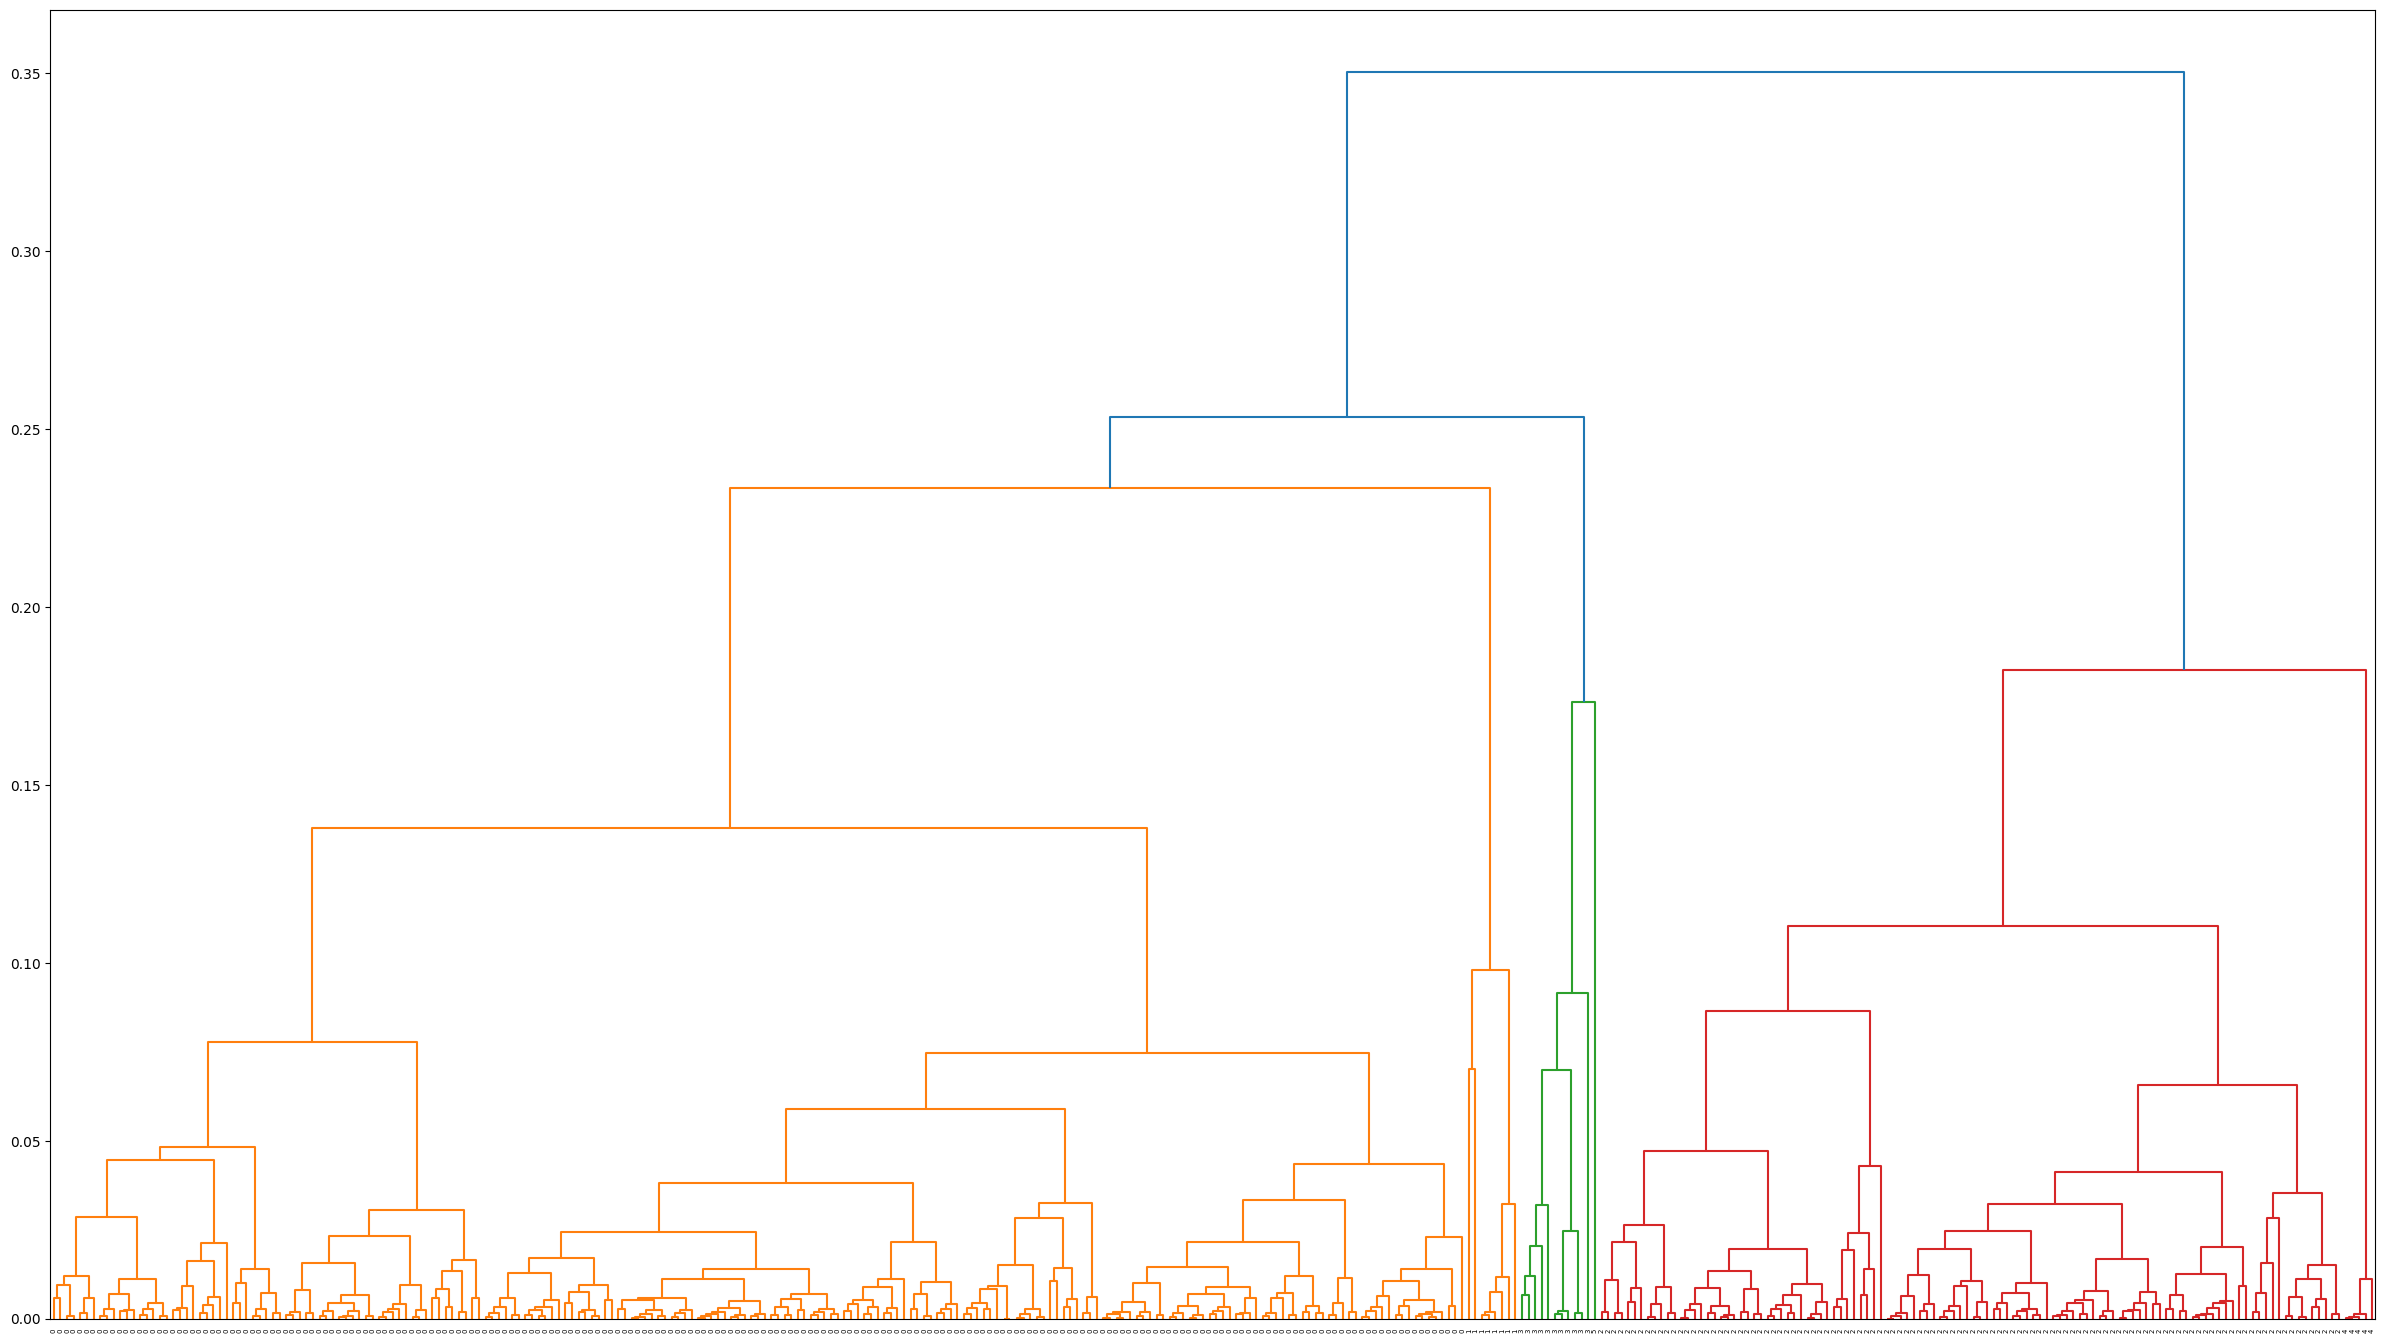

3


In [80]:
plt.figure(figsize=(30, 17))

# визуализируем дендрограмму с ориентацией top
# сначала будут отрисовываться кластеры с минимальным расстоянием между ними
dendrogram(Z=linked,
            orientation='top',
            labels=airbnb_predict,
            distance_sort='descending')

plt.show()
print(3)

Answer: 3

---

Task 8.5

Для датасета Airbnb проведите DBSCAN-кластеризацию. В качестве признаков для кластеризации используйте latitude и longitude. Параметры для алгоритма кластеризации: eps=0.012, min_samples=6.

Визуализируйте результаты. Сколько кластеров получилось на графике?

In [81]:
# Запускаем кластеризацию на наших данных
clustering = DBSCAN(eps=0.012, min_samples=6).fit(df[['latitude', 'longitude']])

'for i in df[\'clusters_3d\'].unique():\n    points = df.query(f"clusters_3d == {i}")[[\'latitude\', \'longitude\']].values\n    \n    hull = ConvexHull(points)\n    \n    # Запишем координаты оболочки по оси x. Из hull.vertices узнаем индексы элементов, входящих в оболочку.\n    # Так как оболочка должна быть замкнутой, то в конце добавляем ещё раз нулевой элемент.\n    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) \n    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0])\n    \n    # рисуем оболочку и заливаем её таким же цветом, как и объекты кластера\n    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])'

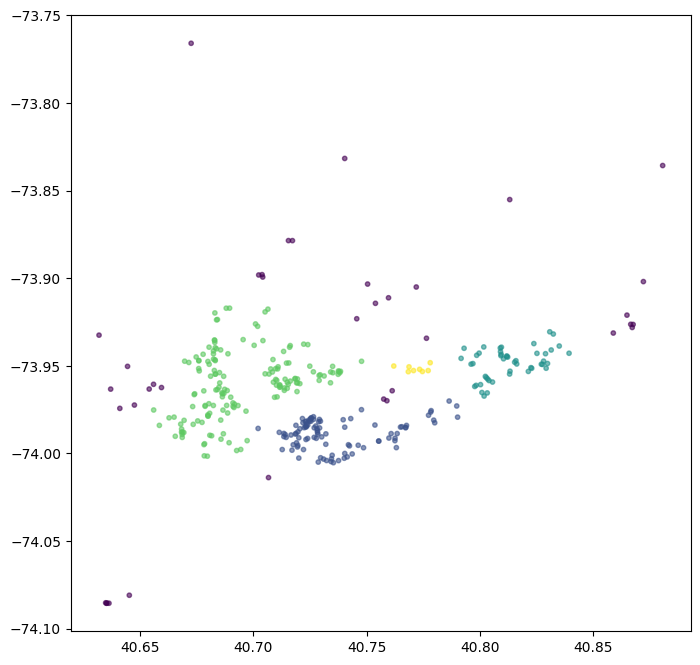

In [82]:
fig, ax = plt.subplots(1, figsize=(8,8))

# визуализируем объекты кластеров и центроиды
plt.scatter(x=df['latitude'], y=df['longitude'], c=clustering.labels_, alpha = 0.6, s=10)


'''for i in df['clusters_3d'].unique():
    points = df.query(f"clusters_3d == {i}")[['latitude', 'longitude']].values
    
    hull = ConvexHull(points)
    
    # Запишем координаты оболочки по оси x. Из hull.vertices узнаем индексы элементов, входящих в оболочку.
    # Так как оболочка должна быть замкнутой, то в конце добавляем ещё раз нулевой элемент.
    x_hull = np.append(points[hull.vertices, 0], points[hull.vertices, 0][0]) 
    y_hull = np.append(points[hull.vertices, 1], points[hull.vertices, 1][0])
    
    # рисуем оболочку и заливаем её таким же цветом, как и объекты кластера
    plt.fill(x_hull, y_hull, alpha=0.2, c=colors[i])'''

Answer: 5

---

### Понижение размерности

In [88]:
Метод главной компоненты

SyntaxError: invalid syntax (3092107582.py, line 1)

In [85]:
# загрузим датасет MNIST
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

dataset = fetch_openml("mnist_784")
# загрузим признаки в переменную X  
X = dataset['data']
# загрузим «ответы» в переменную y
y = dataset['target']
# разделим данные с помощью sklearn на данные для обучения и теста
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.1, random_state=0)

# импортируем StandardScaler для стандартизации данных
from sklearn.preprocessing import StandardScaler

# создадим объект класса StandardScaler
scaler = StandardScaler()
scaler.fit(train_x)
# трансформируем датасеты train_x и test_x
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

# импортируем класс PCA
from sklearn.decomposition import PCA

# создадим объект класса PCA
pca = PCA(n_components=300)
pca.fit(train_x)
# уменьшим размерность данных
train_x_pca = pca.transform(train_x)
test_x_pca = pca.transform(test_x)

/Users/kirillkuznecov/opt/anaconda3/envs/ds/lib/python3.11/site-packages/sklearn/datasets/_openml.py:932: FutureWarning:

The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.



In [86]:
print(len(train_x[0]))
print(len(train_x_pca[0]))

784
300


In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# напишем функцию, которая на вход принимает X и y, а возвращает модель и время
def get_time_and_accuracy(train_x, train_y, test_x, test_y):
    # создадим объект класса LogisticRegression
    log_reg_model = LogisticRegression(max_iter=1000)
    from time import time
    # запишем время с начала эпохи в секундах до обучения модели
    start_time = time()
    # обучим модель
    log_reg_model.fit(train_x, train_y)    
    # запишем время с начала эпохи в секундах после обучения
    end_time = time()
    # подсчитаем время, потраченное на обучение модели
    time = end_time-start_time
    # предскажем на тестовых данных
    y_pred = log_reg_model.predict(test_x)
    # посчитаем скор для тестового предсказания
    score = accuracy_score(test_y, y_pred)
    # вернём время, потраченное на обучение, и качество полученной модели
    return time, score

model_pca_time, model_pca_acc = get_time_and_accuracy(train_x_pca, train_y, test_x_pca, test_y)
print(f"Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения {model_pca_time}, метрика модели {model_pca_acc}")
# Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 54.12072825431824, метрика модели 0.9255714285714286

model_time, model_acc = get_time_and_accuracy(train_x, train_y, test_x, test_y)
print(f"Модель, построенная на всех исходных признаках. Время обучения {model_time}, метрика модели {model_acc}")
# Модель, построенная на всех исходных признаках. Время обучения 108.04033303260803, метрика модели 0.9187142857142857

Модель, построенная на признаках, полученных после уменьшения размерности. Время обучения 70.93007183074951, метрика модели 0.9235714285714286
Модель, построенная на всех исходных признаках. Время обучения 103.44743871688843, метрика модели 0.9187142857142857


---

T-SNE

In [89]:
# импортируем класс TSNE из модуля manifold библиотеки sklearn
from sklearn.manifold import TSNE

# создаём объект класса TSNE
# n_components — размерность нового пространства
tsne = TSNE(n_components=2, perplexity=30, n_iter=500, random_state=42)
# обучаем модель на данных X и производим трансформацию
tsne.fit_transform(X)

array([[ 1.5667064e+01,  2.5798079e-02],
       [ 3.1374992e+01, -1.8581591e+01],
       [ 1.7242271e+01,  3.7437672e+01],
       ...,
       [ 4.1888819e+00,  2.0235611e+01],
       [ 1.0312383e+01,  1.1741742e+01],
       [ 2.9236069e+01,  1.6515596e+01]], dtype=float32)

<AxesSubplot: xlabel='0', ylabel='1'>

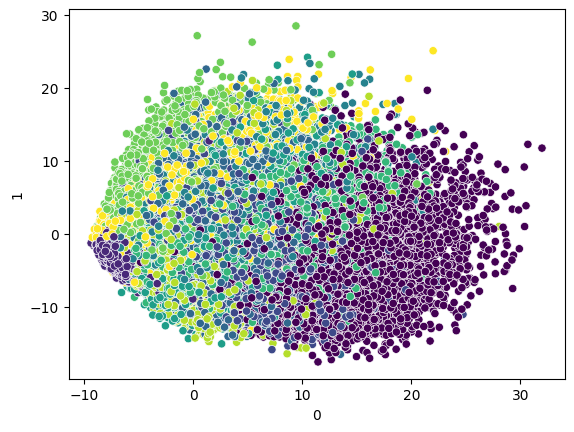

In [90]:
import seaborn as sns

# создадим объект класса PCA, уменьшим размерность данных до 2
pca = PCA(n_components=2, random_state=42)

# уменьшим размерность данных
X_reduced = pca.fit_transform(train_x)
# сохраним данные в датафрейм
df_pca = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_pca['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
# визуализируем
sns.scatterplot(x=df_pca[0], y=df_pca[1], c=df_pca['c'])

<AxesSubplot: xlabel='0', ylabel='1'>

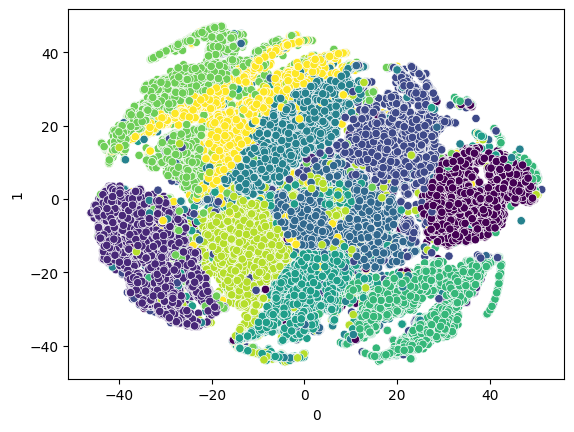

In [91]:
# создадим объект класса TSNE, уменьшим размерность данных до 2
tsne = TSNE(n_components=2, perplexity=50, n_iter=500, random_state=42)
# немного уменьшим количество объектов для уменьшения размерности, иначе алгоритм будет работать очень долго
X_reduced = tsne.fit_transform(train_x)
# сохраним данные в датафрейм
df_tsne = pd.DataFrame(X_reduced)
# сохраним разметки кластеров
df_tsne['c'] = pd.to_numeric(train_y).astype('Int64').to_list()
sns.scatterplot(x=df_tsne[0], y=df_tsne[1], c=df_tsne['c'])